# Brownian motion of a trait through time
We take small discrete steps dt (e.g. a generation). At each step, we measure a trait. To model such a situation, we assume that the trait value V' at time t+dt is Normally distributed of mean V and variance 0.01. We take 100 steps. 

In [1]:
import pandas as pd
import numpy.random as rd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ete3 import Tree, TreeStyle, NodeStyle

%matplotlib inline

In [2]:
def simulate(num):
    times = range(num)
    values=list()
    values.append(0)
    for i in times[1:(len(times))]:
        values.append(rd.normal(loc=values[i-1], scale=0.01))
    simu = pd.DataFrame()
    simu['times']=times
    simu['values']=values
    return simu

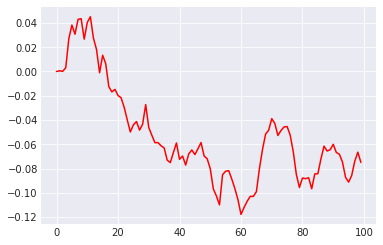

In [3]:
simu = simulate(100)
sns.set_style("darkgrid")
plt.plot(simu["times"], simu["values"], 'r-')
plt.show()

### What is the distribution of the trait after these 100 generations? Let's simulate lots of times and store the end result.

In [4]:
end_values = list()
for i in range(2000):
    end_values.append(simulate(100)['values'][99])


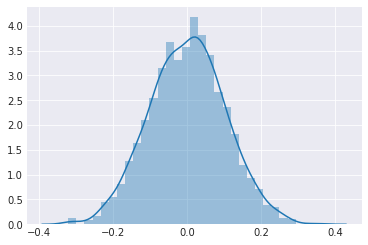

In [5]:
sns.distplot(end_values)

### Does it look like a Normal distribution? We can fit a Normal distribution to our data.

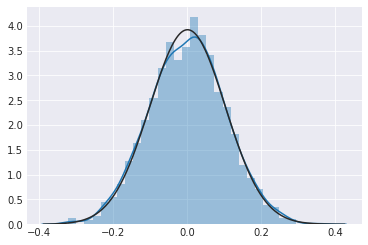

In [6]:
from scipy.stats import norm
sns.distplot(end_values, fit=norm)

### Looks quite close. What are the mean and standard deviation?

In [7]:
print("Mean: "+str(np.mean(end_values)))
print("SD: "+ str(np.std(end_values)))

Mean: 0.00129882759788
SD: 0.101707400925


### After 100 steps, the distribution of the values is a Normal distribution centered on the value at time 0, with standard deviation sqrt(100)*the stepwise standard deviation.

## Simulating along a tree

In [8]:
t = Tree("((((a:1,b:1):1,(c:1,d:1):1):1,((e:1,f:1):1,(g:1,h:1):1):1)30, (((i:1,j:1):1,(k:1,l:1):1):1,((m:1,n:1):1,(o:1,p:1):1):1):30);")

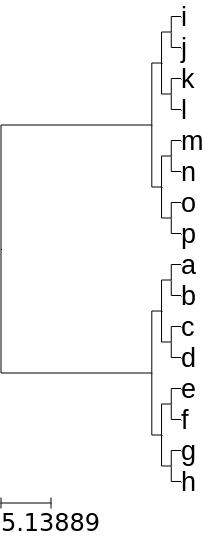

In [9]:
# Calculate the midpoint node
R = t.get_midpoint_outgroup()
# and set it as tree outgroup
t.set_outgroup(R)

ts = TreeStyle()
ts.min_leaf_separation= 0
#ts.scale = 2020 
nstyle = NodeStyle()
nstyle["size"] = 0
for n in t.traverse():
   n.set_style(nstyle)
t.render("%%inline", tree_style=ts)

In [10]:
# We start with a value of 0
def simulate_on_tree():
    root_value = 0.0
    t.get_tree_root().add_features(value=root_value)
    for n in t.traverse("preorder"):
        if n != t.get_tree_root():
            n.add_features(value=rd.normal(loc=n.up.value, scale=np.sqrt(n.dist)))

    values_at_leaves=list()
    names=list()
    for leaf in t:
        values_at_leaves.append(leaf.value)
        names.append(leaf.name)
    simu_tree = pd.DataFrame()
    simu_tree['names']=names
    simu_tree['values']=values_at_leaves
    return simu_tree

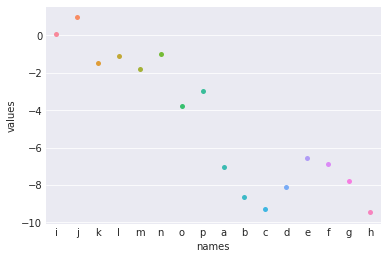

In [11]:
simu_tree = simulate_on_tree()

sns.stripplot("names", "values", data=simu_tree)

## What if we were to simulate 2 traits on the phylogeny?

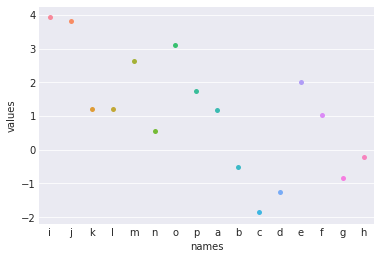

In [12]:
simu_tree_1 = simulate_on_tree()
simu_tree_2 = simulate_on_tree()
simu_tree_1_and_2 = simu_tree_1
simu_tree_1_and_2['values2']=simu_tree_2['values']
sns.stripplot("names", "values", data=simu_tree_1_and_2)

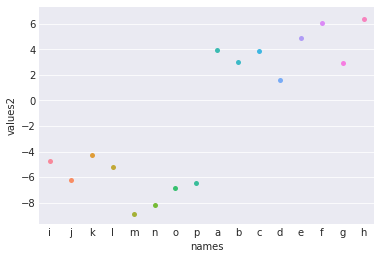

In [13]:
sns.stripplot("names", "values2", data=simu_tree_1_and_2)

### Are those two traits correlated?

Pearson correlation coefficient and p-value: (-0.59890110064598667, 0.01422995400342641)


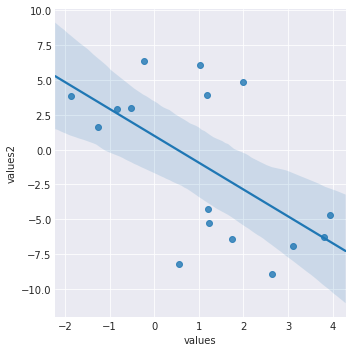

In [14]:
from scipy.stats import pearsonr

sns.lmplot("values", "values2", data=simu_tree_1_and_2)
print("Pearson correlation coefficient and p-value: "+ str(pearsonr(simu_tree_1_and_2['values'], simu_tree_1_and_2['values2'])))
